### Problem Statement

The dataset you are going to use in this practice is the famous Iris dataset. The dataset consists o 150 records of the Iris plant with four features: "sepal-length","sepal-width","petal-length",and "petal-width". All thse features are numeric. The records have been classified into one of the three classed, that is, "Iris-setoa","Iris-versicolor" or "Iris-verginica".

You are supposed to reduce the number of variables by merging correlated variables and extracting the most importandt features from the dataset that are responsible for maximum variance in the output.

In [30]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

In [3]:
data=load_iris()


In [4]:
x = data.data
y= data.target

In [5]:
# split the dataset to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)


In [6]:
print(x_train.shape)

(120, 4)


In [7]:
from sklearn.linear_model import LogisticRegression


In [8]:
lr=LogisticRegression()

In [9]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#predict y
y_pred= lr.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_pred,y_test)*100

In [12]:
print(accuracy)

96.66666666666667


In [13]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_pred, y_test)*100

In [14]:
print(r2_score)

94.27480916030534


In [15]:
# import PCA

from sklearn.decomposition import PCA


In [16]:
sklearn_pca = PCA(n_components=0.95)

In [17]:
sklearn_pca.fit(x_train)

PCA(n_components=0.95)

In [18]:
x_train_transformed= sklearn_pca.transform(x_train)

In [19]:
print(x_train_transformed.shape)

(120, 2)


In [20]:
x_test_transformed = sklearn_pca.transform(x_test)
print(x_test_transformed.shape)

(30, 2)


In [21]:
lr=LogisticRegression(penalty='l2')

In [22]:
lr.fit(x_train_transformed,y_train)

LogisticRegression()

In [23]:
y_predict=lr.predict(x_test_transformed)

In [24]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_predict,y_test)

In [25]:
print(accuracy)

0.9666666666666667


In [26]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [27]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

### Confusion Matrix

In [28]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score: 0.9666666666666667')

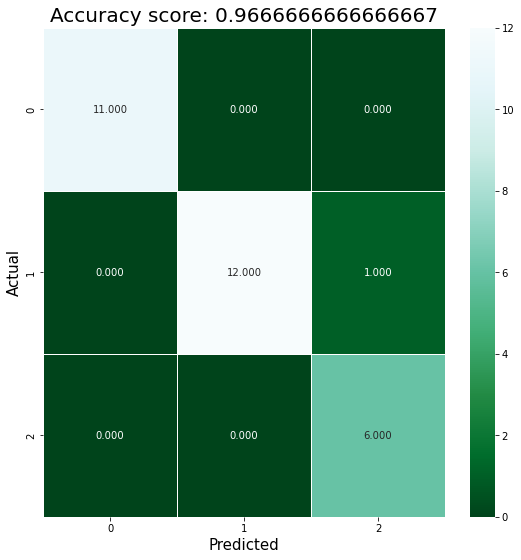

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths='.5', cmap='BuGn_r')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
all_title='Accuracy score: {0}'.format(accuracy)
plt.title(all_title, size=20)